In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model

from tensorflow.keras.callbacks import TensorBoard


# Dynamic Pressure

In [2]:
Normal_DP=pd.read_csv("Normal_DP.csv")
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [3]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [4]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [5]:
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.000000,0.606337,0.140830,0.446902,1.000000
1,1.000000,0.606337,0.140830,0.437408,1.000000
2,1.000000,0.606337,0.140830,0.440331,1.000000
3,1.000000,0.606337,0.140830,0.391129,1.000000
4,1.000000,0.606337,0.140830,0.449095,1.000000
...,...,...,...,...,...
919995,0.282609,0.244143,0.013318,0.587428,0.285016
919996,0.282609,0.244143,0.013318,0.642229,0.285016
919997,0.282609,0.244143,0.013318,0.586456,0.285016
919998,0.282609,0.244143,0.013318,0.612029,0.285016


In [6]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [7]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [8]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [9]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [10]:
df=Normal_DP
Cavdf=Cavitation_DP

In [11]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [12]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

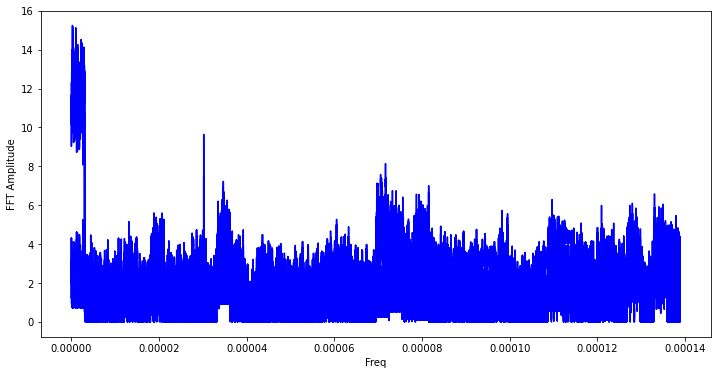

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [14]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

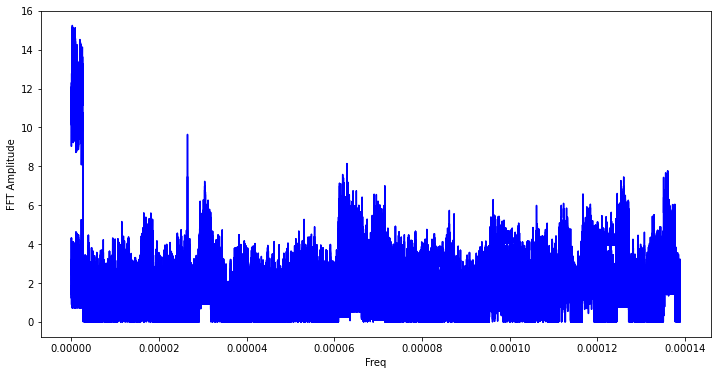

In [15]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq')
plt.ylabel('FFT Amplitude')
plt.show()

In [16]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [17]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])

In [18]:
X_Norm['Time ']=Normal_DPx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [19]:
X_cav['Time ']=Cavitation_DPx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391
...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805


In [20]:
X_train=X_Norm

In [21]:
X_Norm

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time
0,10.949224,9.380308,-0.025825,-0.025825,9.380308,0.000000
1,10.869041,9.445177,-0.050602,-0.050602,9.445177,0.000098
2,10.893730,9.425203,-0.042973,-0.042973,9.425203,0.000195
3,10.478212,9.761365,-0.171375,-0.171375,9.761365,0.000293
4,10.967740,9.365328,-0.020103,-0.020103,9.365328,0.000391
...,...,...,...,...,...,...
919995,-1.114366,1.159629,0.496483,0.496483,1.159629,89.843262
919996,-0.651565,0.785215,0.639496,0.639496,0.785215,89.843359
919997,-1.122577,1.166271,0.493945,0.493945,1.166271,89.843457
919998,-0.906607,0.991548,0.560684,0.560684,0.991548,89.843555


In [22]:
X_train=X_train.drop(columns=['Time '])

In [23]:
X_train=np.array(X_train)


In [24]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [25]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 5, 1)

In [26]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(5, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(5, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(25, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [27]:
X_test=X_cav

In [28]:
X_test=X_test.drop(columns=['Time '])

In [29]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 52s 25ms/step - loss: 0.2916 - val_loss: 0.1331
Epoch 2/150
1797/1797 [==============================] - 42s 23ms/step - loss: 0.0933 - val_loss: 0.0968
Epoch 3/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0859 - val_loss: 0.1014
Epoch 4/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0812 - val_loss: 0.0759
Epoch 5/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0785 - val_loss: 0.0747
Epoch 6/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0742 - val_loss: 0.0812
Epoch 7/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0718 - val_loss: 0.0742
Epoch 8/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0703 - val_loss: 0.0662
Epoch 9/150
1797/1797 [==============================] - 43s 24ms/step - loss: 0.0680 - val_loss: 0.0670
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 46s 25ms/step - loss: 0.0475 - val_loss: 0.0732
Epoch 79/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0483 - val_loss: 0.0710
Epoch 80/150
1797/1797 [==============================] - 44s 25ms/step - loss: 0.0485 - val_loss: 0.0732
Epoch 81/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0477 - val_loss: 0.0729
Epoch 82/150
1797/1797 [==============================] - 46s 26ms/step - loss: 0.0470 - val_loss: 0.0767
Epoch 83/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0474 - val_loss: 0.0878
Epoch 84/150
1797/1797 [==============================] - 44s 25ms/step - loss: 0.0472 - val_loss: 0.0662
Epoch 85/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0474 - val_loss: 0.0742
Epoch 86/150
1797/1797 [==============================] - 45s 25ms/step - loss: 0.0473 - val_loss: 0.0812
Epoch 87/150
1797/1797 [==============================] - 4

In [30]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 84s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

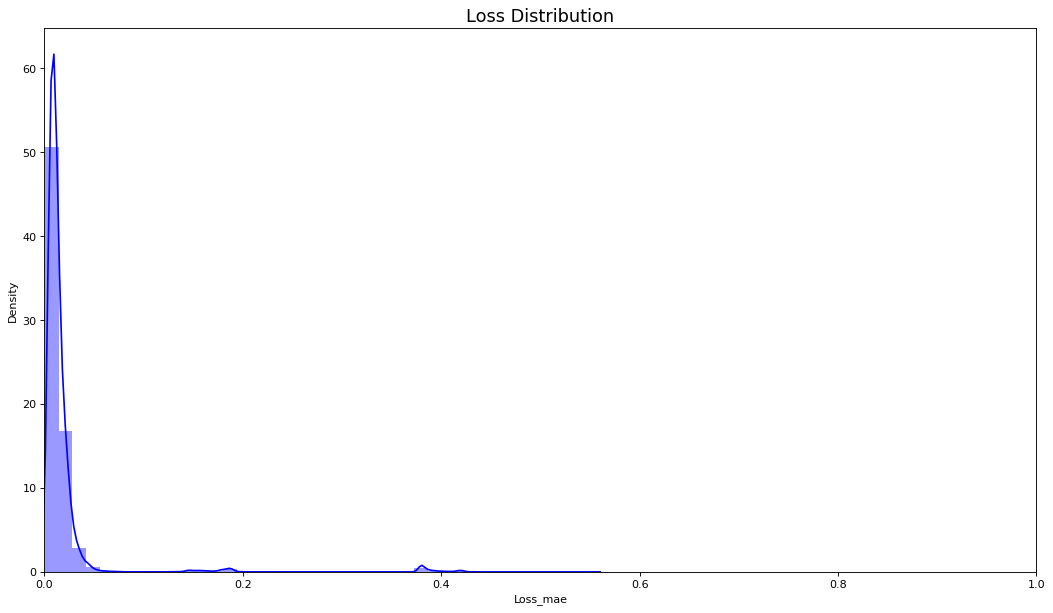

In [31]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [32]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 111s 3ms/step


In [33]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 5, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

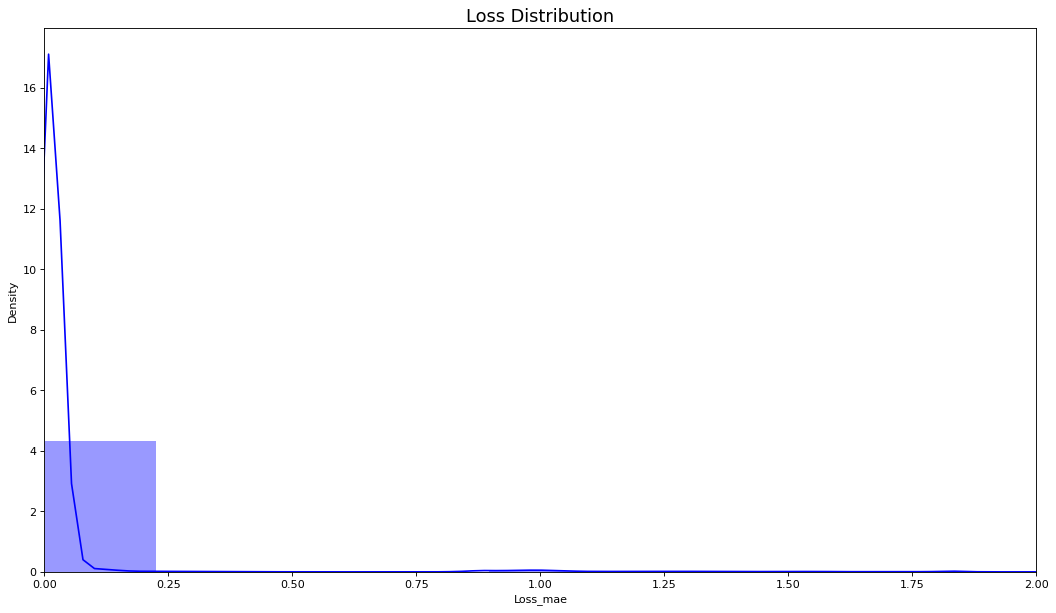

In [34]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.25)

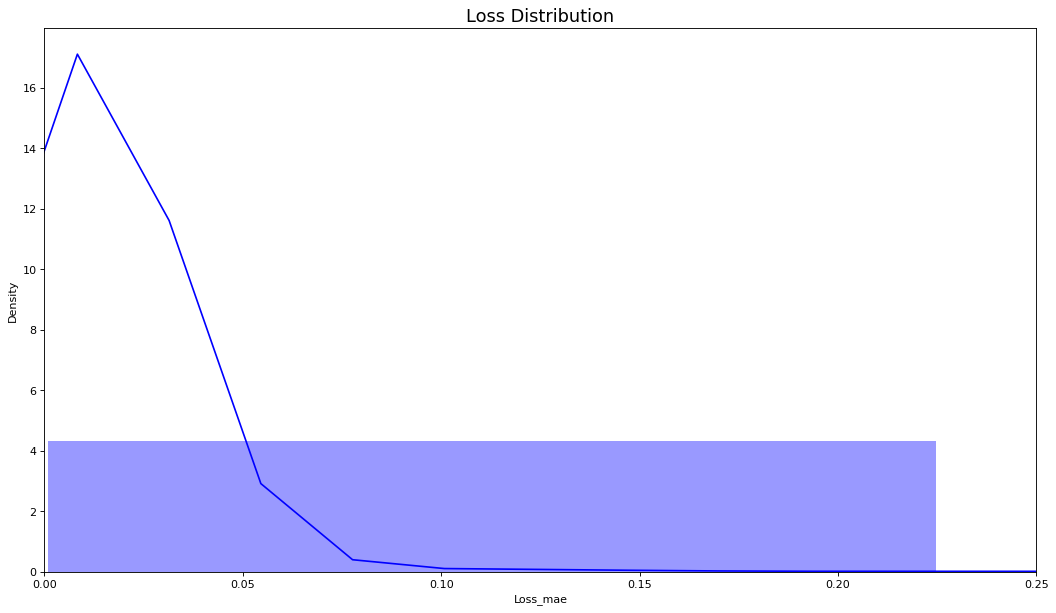

In [35]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.25])

In [36]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.11

In [37]:
test_mae_loss.shape

(1048576, 1)

In [38]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


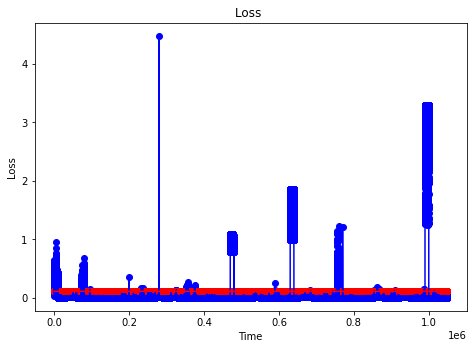

In [39]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Time')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [40]:
test_score_df

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
0,2.654498,-2.256242,-0.665647,-0.665647,-2.256242,0.000000,0.030310,0.11,False
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.227687,0.11,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.196432,0.11,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.279415,0.11,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.142040,0.11,True
...,...,...,...,...,...,...,...,...,...
1048571,1.181810,-1.119986,0.218008,0.218008,-1.119986,102.399512,0.012161,0.11,False
1048572,0.462503,-0.538054,-0.004271,-0.004271,-0.538054,102.399609,0.005914,0.11,False
1048573,0.730292,-0.754700,0.078481,0.078481,-0.754700,102.399707,0.008530,0.11,False
1048574,1.110978,-1.062682,0.196119,0.196119,-1.062682,102.399805,0.010023,0.11,False


In [41]:
test_score_df["anomaly"][1]

True

In [42]:
anomalies=test_score_df


In [43]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,Time,loss,threshold,anomaly
1,6.477165,0.816141,-0.389844,-0.389844,0.816141,0.000098,0.227687,0.11,True
2,6.314395,0.947824,-0.440142,-0.440142,0.947824,0.000195,0.196432,0.11,True
3,6.760710,0.586748,-0.302223,-0.302223,0.586748,0.000293,0.279415,0.11,True
4,5.886511,1.293990,-0.572366,-0.572366,1.293990,0.000391,0.142040,0.11,True
5,6.584858,0.729015,-0.356564,-0.356564,0.729015,0.000488,0.250883,0.11,True
...,...,...,...,...,...,...,...,...,...
999997,-10.823654,-6.972813,0.020556,0.020556,-6.972813,97.655957,3.213131,0.11,True
999998,-10.311711,-7.386984,0.178755,0.178755,-7.386984,97.656055,3.141427,0.11,True
999999,-10.253962,-7.433704,0.196601,0.196601,-7.433704,97.656152,3.119698,0.11,True
1014731,2.890646,-4.481061,2.568149,2.568149,-4.481061,99.094824,0.123717,0.11,True


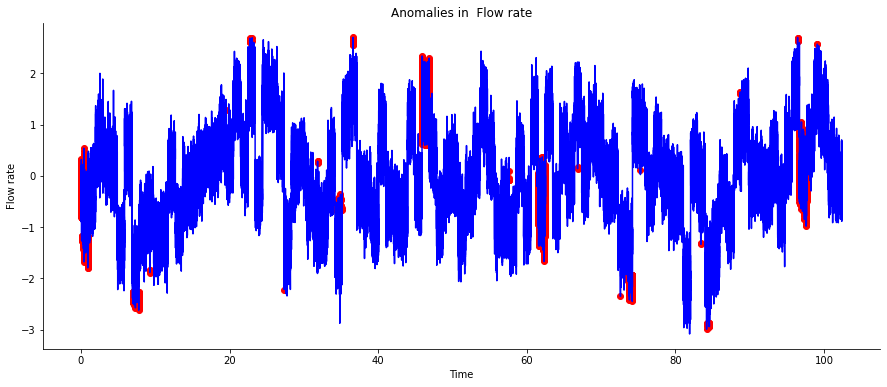

In [44]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

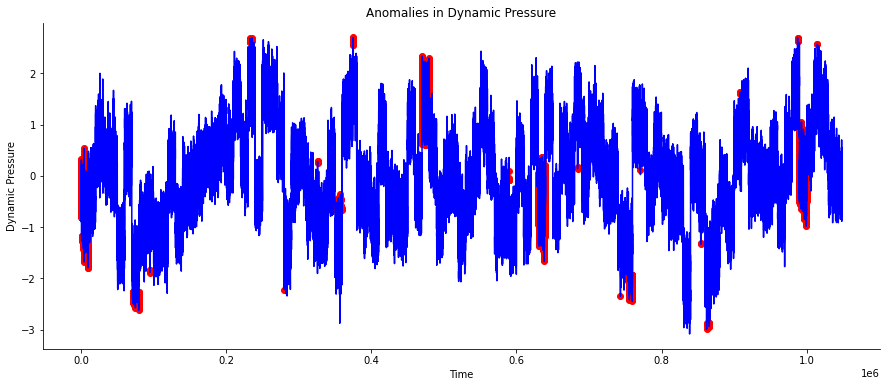

In [45]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df.index, test_score_df['Dynamic Pressure'], color='blue')
ax.scatter(anomalies.index, anomalies['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

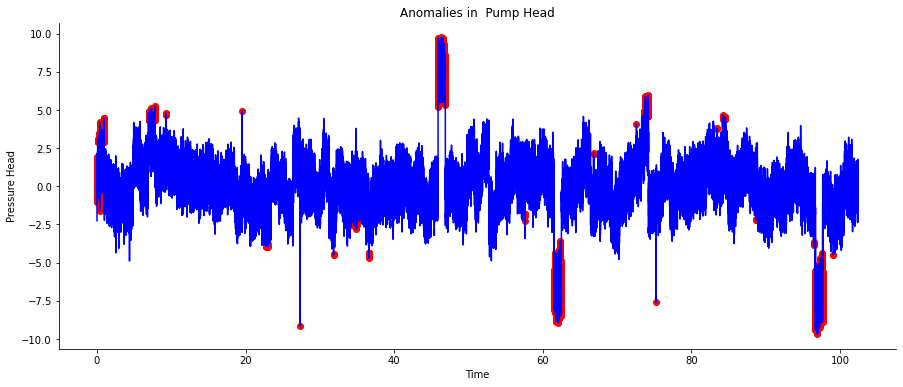

In [46]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pump Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

In [47]:
model.save("LSTM01_DP_frequency")


INFO:tensorflow:Assets written to: LSTM01_DP_frequency\assets


# Vibration


In [48]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [49]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [50]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [51]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [52]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [53]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [54]:
scaler = StandardScaler()

scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [55]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [56]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [57]:
X_Norm = fft(df)
N = len(df)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

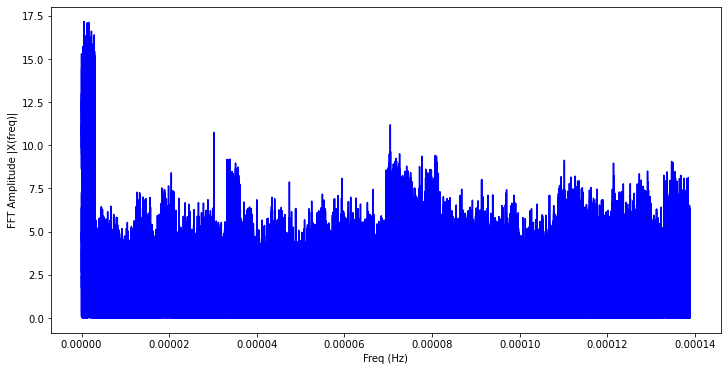

In [58]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_Norm[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [59]:
X_cav = fft(Cavdf)
N = len(Cavdf)
n = np.arange(N)
sr = 1 / (60*60)
T = N/sr
freq = n/T 
# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

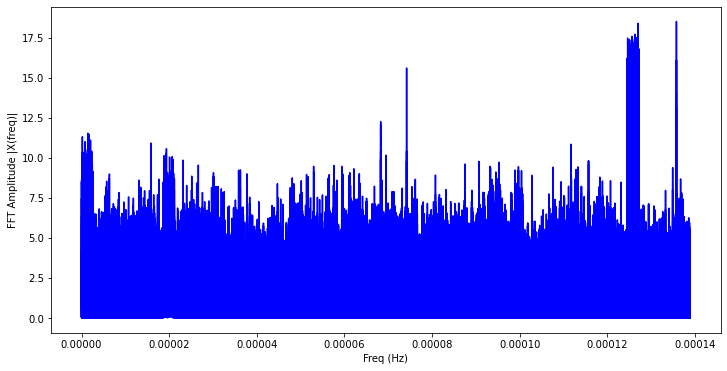

In [60]:
plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X_cav[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [61]:
X_Norm = X_Norm.real.astype(np.float32)
X_cav = X_cav.real.astype(np.float32)

In [62]:
X_Norm = pd.DataFrame(X_Norm, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
X_cav = pd.DataFrame(X_cav, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [63]:
X_Norm['Time ']=Normal_Vibx['Time ']
X_Norm

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866,0.000000
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993,0.000098
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361,0.000195
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410,0.000293
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047,0.000391
...,...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512,89.843262
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837,89.843359
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768,89.843457
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567,89.843555


In [64]:
X_cav['Time ']=Cavitation_Vibx['Time ']
X_cav

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391
...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805


In [65]:
X_train=X_Norm

In [66]:
X_train=X_train.drop(columns=['Time '])

In [67]:
X_train

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,12.398434,9.071866,3.723394,-2.399124,3.723394,9.071866
1,12.142680,9.773993,2.128517,-0.357873,2.128517,9.773993
2,12.142035,9.807361,2.029707,-0.226340,2.029707,9.807361
3,12.945234,8.713410,3.705159,-2.192544,3.705159,8.713410
4,9.474541,11.131047,3.393636,-2.934078,3.393636,11.131047
...,...,...,...,...,...,...
919995,-4.213120,2.982512,0.674927,-0.464332,0.674927,2.982512
919996,-0.254025,-0.074837,1.928787,-0.816447,1.928787,-0.074837
919997,-1.918158,1.252768,1.274237,-0.498425,1.274237,1.252768
919998,-0.940173,1.115567,-0.270130,1.886726,-0.270130,1.115567


In [68]:
X_train=np.array(X_train)


In [69]:
timesteps=X_train.shape[0]
features=X_train.shape[1]


In [70]:
X_train.shape=(timesteps,features,1)
X_train.shape

(920000, 6, 1)

In [71]:
#Starting the LSTM model
model = keras.Sequential()

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(6, activation='relu', return_sequences=False))
model.add(layers.BatchNormalization())

model.add(layers.RepeatVector(features))

model.add(layers.LSTM(6, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.LSTM(36, activation='relu', return_sequences=True))
model.add(layers.BatchNormalization())

model.add(layers.TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer='adam', loss='mae')



In [72]:
X_test=X_cav

In [73]:
X_test=X_test.drop(columns=['Time '])

In [74]:
X_test.shape

(1048576, 6)

In [75]:
model.fit(X_train, X_train, epochs=150, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/150
1797/1797 [==============================] - 80s 40ms/step - loss: 0.4467 - val_loss: 0.2233
Epoch 2/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.1281 - val_loss: 0.2264
Epoch 3/150
1797/1797 [==============================] - 70s 39ms/step - loss: 0.1118 - val_loss: 0.2339
Epoch 4/150
1797/1797 [==============================] - 69s 38ms/step - loss: 0.1065 - val_loss: 0.2079
Epoch 5/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.1041 - val_loss: 0.1766
Epoch 6/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.1013 - val_loss: 0.1927
Epoch 7/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.0973 - val_loss: 0.1808
Epoch 8/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.0956 - val_loss: 0.1203
Epoch 9/150
1797/1797 [==============================] - 67s 37ms/step - loss: 0.0934 - val_loss: 0.1179
Epoch 10/150
1797/1797 [==============================]

1797/1797 [==============================] - 80s 45ms/step - loss: 0.0569 - val_loss: 0.0740
Epoch 79/150
1797/1797 [==============================] - 78s 44ms/step - loss: 0.0562 - val_loss: 0.0871
Epoch 80/150
1797/1797 [==============================] - 80s 45ms/step - loss: 0.0558 - val_loss: 0.0865
Epoch 81/150
1797/1797 [==============================] - 78s 43ms/step - loss: 0.0550 - val_loss: 0.0808
Epoch 82/150
1797/1797 [==============================] - 79s 44ms/step - loss: 0.0556 - val_loss: 0.0851
Epoch 83/150
1797/1797 [==============================] - 78s 43ms/step - loss: 0.0549 - val_loss: 0.0918
Epoch 84/150
1797/1797 [==============================] - 79s 44ms/step - loss: 0.0560 - val_loss: 0.0722
Epoch 85/150
1797/1797 [==============================] - 80s 44ms/step - loss: 0.0550 - val_loss: 0.0899
Epoch 86/150
1797/1797 [==============================] - 79s 44ms/step - loss: 0.0546 - val_loss: 0.0733
Epoch 87/150
1797/1797 [==============================] - 8

In [76]:
X_pred = model.predict(X_train, verbose=1)

28750/28750 [==============================] - 81s 3ms/step


C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

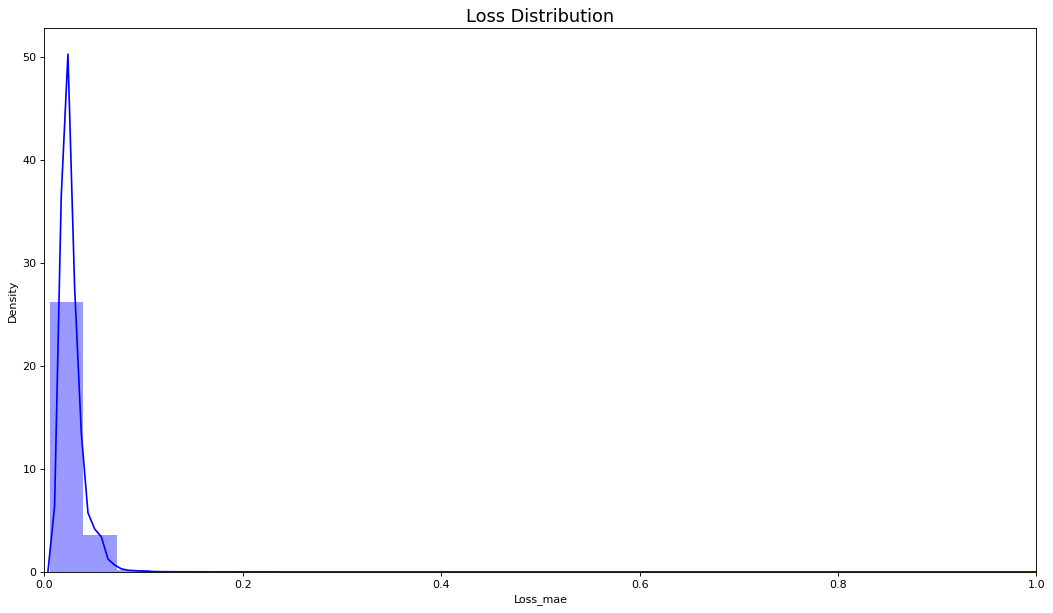

In [77]:
scored = pd.DataFrame(index=X_Norm.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 40, kde= True, color = 'blue');
plt.xlim([0.0,1.0])

In [78]:
X_pred = model.predict(X_test, verbose=1)

32768/32768 [==============================] - 100s 3ms/step


In [79]:
X_test=np.array(X_test)
X_test.shape=(1048576, features,1)
X_test.shape

(1048576, 6, 1)

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2.0)

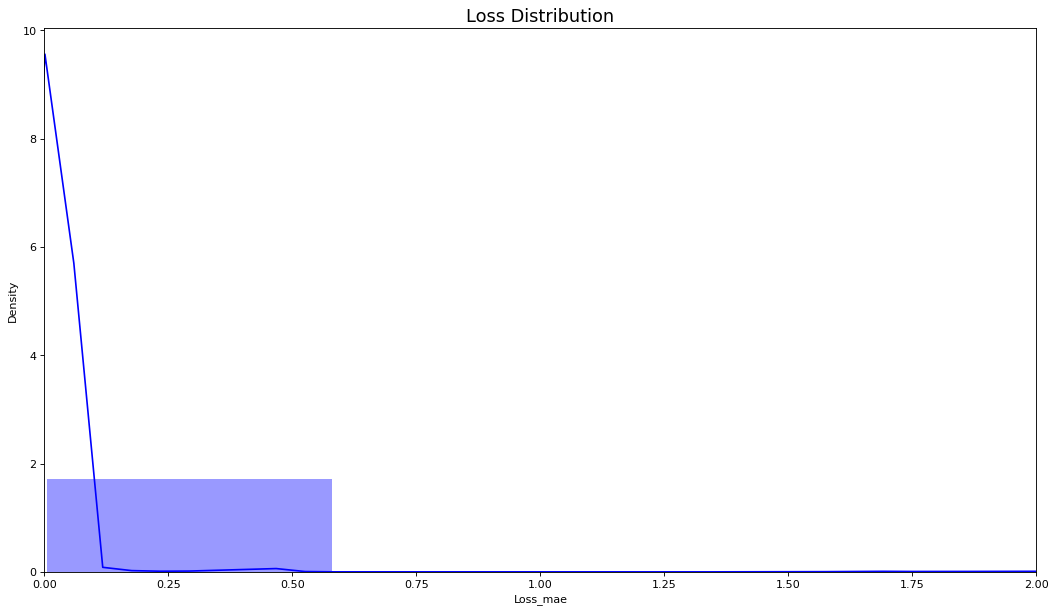

In [80]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,2.0])

C:\Users\glowi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.5)

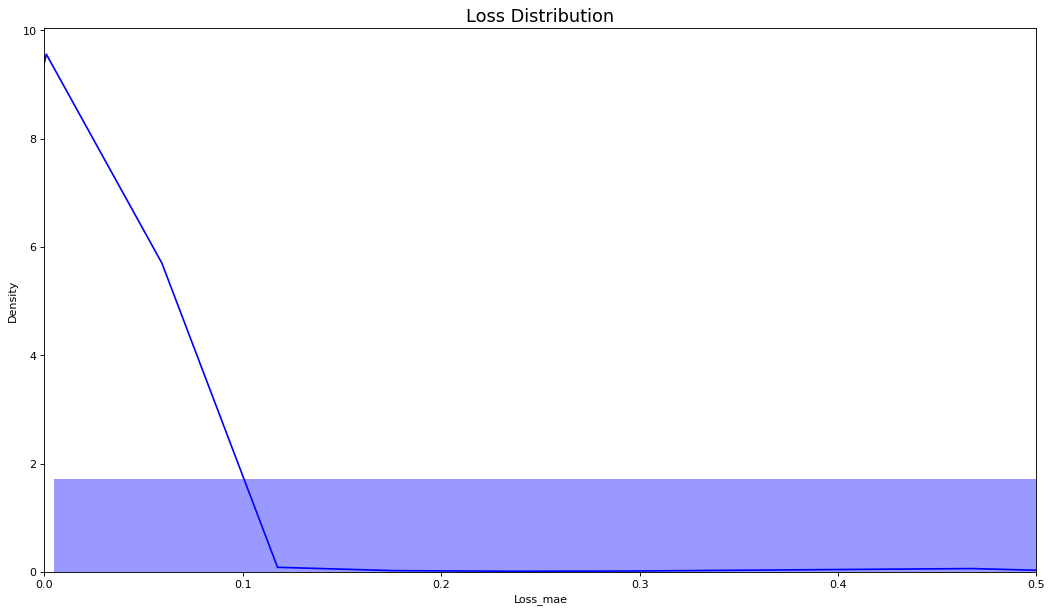

In [81]:
scored = pd.DataFrame(index=X_cav.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,0.5])

In [94]:
# calculate the loss on the test set
test_mae_loss = np.mean(np.abs(X_pred-X_test), axis = 1)
threshold=0.45

In [95]:
test_score_df = X_cav
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']


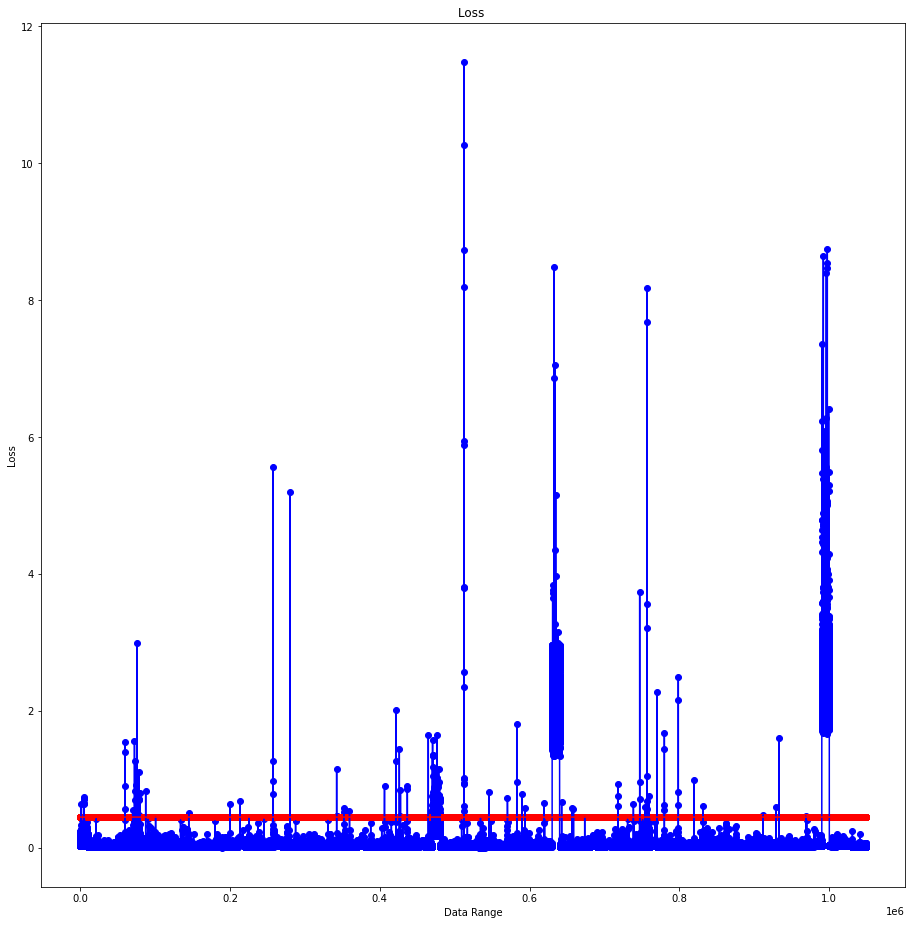

In [96]:
fig=plt.figure()
plt.rcParams["figure.figsize"] = (12,12)
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=test_score_df.index, y=test_score_df['loss'],color='b')
ax.scatter(x=test_score_df.index, y=test_score_df['threshold'], color='r')
ax.plot(test_score_df.index, test_score_df['loss'], color='b')
ax.plot(test_score_df.index, test_score_df['threshold'], color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Loss')
ax.set_title('Loss ')
plt.show()

In [97]:
test_score_df

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
0,1.778136,-1.118543,-1.223256,-0.921674,-1.223256,-1.118543,0.000000,0.020903,0.45,False
1,4.734303,2.973048,-0.457219,-0.970248,-0.457219,2.973048,0.000098,0.111955,0.45,False
2,6.387003,1.806649,-0.263424,-0.677741,-0.263424,1.806649,0.000195,0.040612,0.45,False
3,6.385583,1.673558,0.138688,-1.214364,0.138688,1.673558,0.000293,0.036809,0.45,False
4,5.022058,2.422576,0.618687,-2.308871,0.618687,2.422576,0.000391,0.065113,0.45,False
...,...,...,...,...,...,...,...,...,...,...
1048571,-0.435910,0.404058,-0.922678,0.726574,-0.922678,0.404058,102.399512,0.021393,0.45,False
1048572,0.501458,-0.320350,-0.624189,0.641045,-0.624189,-0.320350,102.399609,0.024509,0.45,False
1048573,1.084794,-0.790656,-0.379945,0.509830,-0.379945,-0.790656,102.399707,0.026208,0.45,False
1048574,-0.526195,0.596610,-1.319763,1.225925,-1.319763,0.596610,102.399805,0.021156,0.45,False


In [98]:
test_score_df["anomaly"][1]

False

In [99]:
anomalies=test_score_df


In [100]:
anomalies=anomalies.drop(anomalies.index[anomalies["anomaly"] ==False])
anomalies

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,Time,loss,threshold,anomaly
734,11.307090,-2.217315,1.968295,-2.013338,1.968295,-2.217315,0.071680,0.647166,0.45,True
4472,4.051106,5.271986,-5.987642,6.175917,-5.987642,5.271986,0.436719,0.708465,0.45,True
4485,4.512253,4.911231,-5.827668,6.116334,-5.827668,4.911231,0.437988,0.656196,0.45,True
5363,10.034026,-2.043109,3.991803,-5.135703,3.991803,-2.043109,0.523730,0.641017,0.45,True
5366,11.531569,-2.398264,2.062184,-2.063697,2.062184,-2.398264,0.524023,0.740673,0.45,True
...,...,...,...,...,...,...,...,...,...,...
999995,-10.563621,-7.574162,-4.023697,4.085535,-4.023697,-7.574162,97.655762,2.550172,0.45,True
999996,-11.829007,-6.804010,-3.803379,3.369981,-3.803379,-6.804010,97.655859,2.607447,0.45,True
999997,-13.487304,-6.046403,-2.759607,1.425520,-2.759607,-6.046403,97.655957,1.917117,0.45,True
999998,-11.981505,-7.325972,-1.932497,0.824640,-1.932497,-7.325972,97.656055,2.538091,0.45,True


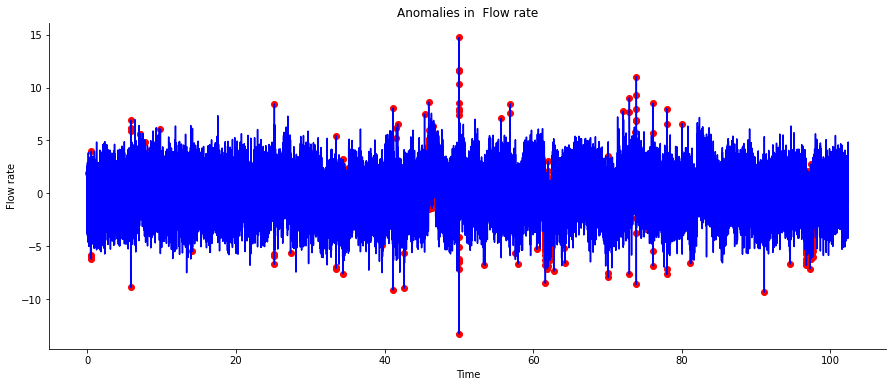

In [101]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Q  L/M'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in  Flow rate")
plt.xlabel("Time")
plt.ylabel("Flow rate")

plt.show()

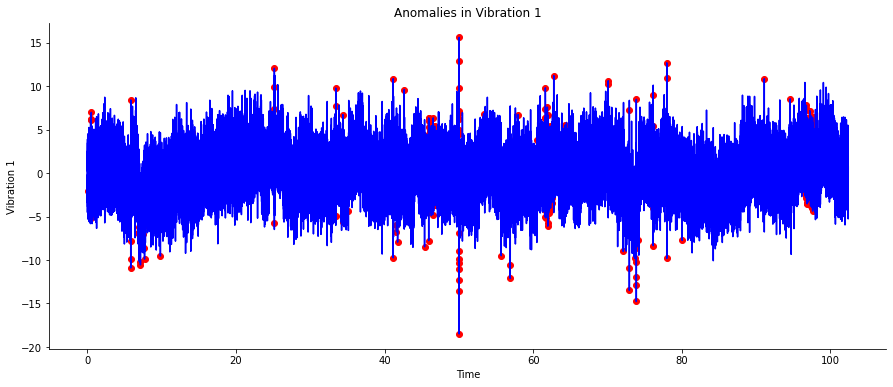

In [102]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Vibration 1'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1")
plt.xlabel("Time")
plt.ylabel("Vibration 1")

plt.show()

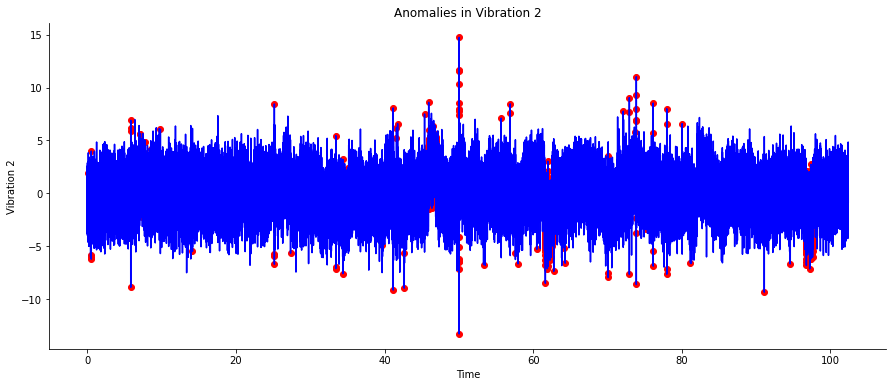

In [103]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['Vibration 2'], color='blue')
ax.scatter(anomalies['Time '], anomalies['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")

plt.show()

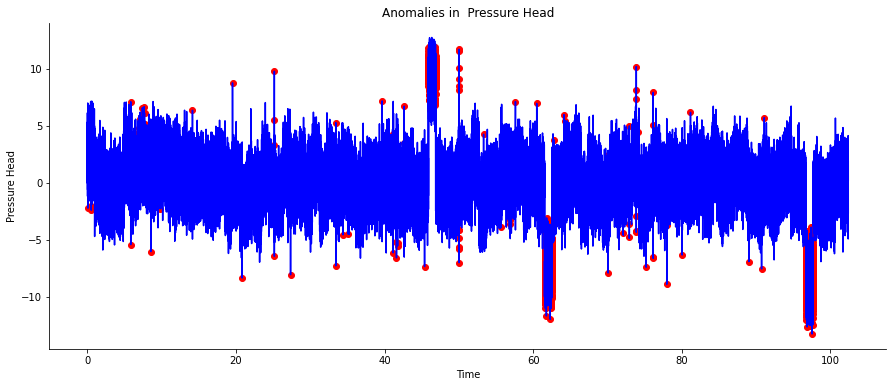

In [104]:
fig, ax = plt.subplots(figsize=(15,6))


ax.plot(test_score_df['Time '], test_score_df['H'], color='blue')
ax.scatter(anomalies['Time '], anomalies['H'], color='red')
sb.despine()
plt.title("Anomalies in  Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")

plt.show()

In [105]:
model.save("LSTM01_Vib_frequency")


INFO:tensorflow:Assets written to: LSTM01_Vib_frequency\assets


INFO:tensorflow:Assets written to: LSTM01_Vib_frequency\assets
